### Confidence intervals (CIs) - Example

According to the sample size, the CI can be built, alternatively:
1. On a t-distribution (t-score, $Z_{\alpha/2}$), if $N\leq30$
2. On a normal distribution (z-score, $t_{\alpha/2, dof}$), if $N>30$

Note that, for $N\approx30$, both tests should be tried. Note also that in the (rare) event that the population variance $\sigma^2$ is known, the *z-score* should be used. Since $\sigma^2$ is almost never known, the *t-score* is almost always used.

In `scipy.stats`, the `t` and `norm` libraries are similar, besides the fact that the former needs the *degree of freedom* (dof) to be specified. Remember that $\text{dof} = N-1$, where $N$ is the number of samples in the dataset.

In [2]:
import scipy.stats as stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(5,5)})

In [3]:
body = pd.read_csv('data/bodytemp.csv')
body.head()

,temp,sex,bpm
0,96.3,0,70
1,96.7,0,71
2,96.9,0,74
3,97.0,0,80
4,97.1,0,73


In [5]:
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    130 non-null    float64
 1   sex     130 non-null    int64  
 2   bpm     130 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.2 KB


N. of records: 65


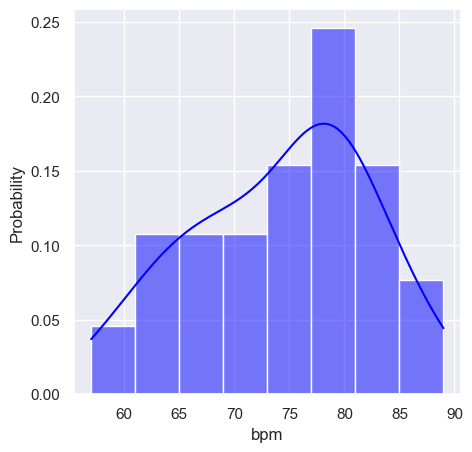

In [8]:
female_hr = body[body.sex == 1]['bpm'] # let's look at the female (sex=1) population
print(f"N. of records: {len(female_hr)}")
sns.histplot(female_hr, color='blue', kde=True, stat='probability')
plt.show()

In [11]:
# sample statistics
n = len(female_hr)          # n. of samples
x_hat = female_hr.mean()    # sample mean
std_dev = female_hr.std()   # sample st.dev.
print(f"N. of Samples:\t{n}\nSample Mean:\t{x_hat:.1f}\nSample St.Dev:\t{std_dev:.1f}")

N. of Samples:	65
Sample Mean:	74.2
Sample St.Dev:	8.1


In [22]:
# Calculating CIs from z- and t- scores
alpha = 0.05
print(f'{1-alpha:.2%} Confidence Interval from z-test: {stats.norm.interval(confidence=alpha, loc=np.mean(female_hr), scale=stats.sem(female_hr))}')
print(f'{1-alpha:.2%} Confidence Interval from t-test: {stats.t.interval(confidence=alpha, df=len(female_hr)-1, loc=np.mean(female_hr), scale=stats.sem(female_hr))}')

95.00% Confidence Interval from z-test: (74.0908051655888, 74.21688714210352)
95.00% Confidence Interval from t-test: (74.09055746175093, 74.21713484594139)


We can see that, according to the level of $\alpha$ we choose, we may accept or reject the null hypothesis, i.e., that the sample distribution actually follows a normal or Student's t distribution with $\hat{x}$ mean and $s$ std. dev. The more confident we want to be about our results, the tighet our CI gets.